<a href="https://colab.research.google.com/github/adarshtomar333/Stock-Prediction-/blob/main/StockPrecidtion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [8]:
# Step 1: List of 100 ticker symbols
tickers = [
    'AAPL', 'MSFT', 'GOOGL', 'AMZN', 'FB', 'TSLA', 'BRK-B', 'JPM', 'JNJ', 'V',
    'WMT', 'PG', 'NVDA', 'DIS', 'MA', 'HD', 'PYPL', 'VZ', 'NFLX', 'ADBE',
    'INTC', 'KO', 'PFE', 'PEP', 'MRK', 'CSCO', 'T', 'XOM', 'CVX', 'ABT',
    'MCD', 'CRM', 'NKE', 'LLY', 'UNH', 'MDT', 'DHR', 'ABBV', 'BMY', 'NEE',
    'ACN', 'AVGO', 'TXN', 'QCOM', 'HON', 'COST', 'PM', 'ORCL', 'LIN', 'UPS',
    'RTX', 'IBM', 'BA', 'AMGN', 'MS', 'LMT', 'GS', 'CAT', 'SCHW', 'SBUX',
    'SPGI', 'BLK', 'GILD', 'CVS', 'ISRG', 'AMT', 'AMD', 'FIS', 'TMO', 'SYK',
    'USB', 'MO', 'PLD', 'PNC', 'ADP', 'BK', 'MMC', 'DUK', 'CCI', 'COP',
    'DE', 'SO', 'FDX', 'MDLZ', 'AXP', 'C', 'EL', 'HUM', 'ADI', 'AON', 'MCO',
    'CI', 'APD', 'ZTS', 'EW', 'CB', 'HCA', 'ITW', 'BAX', 'GD', 'REGN', 'SHW'
]

# Step 2: Fetch data for each company
data_dict = {}
for ticker in tickers:
    try:
        data = yf.download(ticker, start='2010-01-01', end='2023-01-01')
        data['Ticker'] = ticker  # Add a column to identify the company
        data_dict[ticker] = data
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")

# Step 3: Combine all data into a single DataFrame
combined_data = pd.concat(data_dict.values())

# Optional: Save the dataset to a CSV file
combined_data.to_csv('stock_data_100_companies.csv', index=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FB']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******************

In [9]:

# Step 1: Load the CSV file
combined_data = pd.read_csv('/content/stock_data_100_companies.csv', index_col=0)

In [10]:

# Step 2: Preprocess the Data
# Normalize the data and create sequences for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))

# Dictionary to store each company's data
company_data = {}

for ticker in combined_data['Ticker'].unique():
    # Get the data for each company
    company_df = combined_data[combined_data['Ticker'] == ticker]

    # We will only use the 'Close' column for simplicity
    scaled_data = scaler.fit_transform(company_df['Close'].values.reshape(-1, 1))

    X, y = [], []
    for i in range(60, len(scaled_data)):
        X.append(scaled_data[i-60:i, 0])
        y.append(scaled_data[i, 0])

    # Reshape for LSTM
    X, y = np.array(X), np.array(y)
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))

    company_data[ticker] = {'X': X, 'y': y}

In [11]:
# Step 3: Build and Train the Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(60, 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
# Train on the first company as an example (you can loop through all companies)
first_ticker = list(company_data.keys())[0]
X_train, y_train = company_data[first_ticker]['X'], company_data[first_ticker]['y']

model.fit(X_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
3212/3212 ━━━━━━━━━━━━━━━━━━━━ 99s 30ms/step - loss: 0.0024
Epoch 2/5
3212/3212 ━━━━━━━━━━━━━━━━━━━━ 139s 29ms/step - loss: 4.8937e-04
Epoch 3/5
3212/3212 ━━━━━━━━━━━━━━━━━━━━ 93s 29ms/step - loss: 7.9150e-04
Epoch 4/5
3212/3212 ━━━━━━━━━━━━━━━━━━━━ 145s 30ms/step - loss: 2.7052e-04
Epoch 5/5
3212/3212 ━━━━━━━━━━━━━━━━━━━━ 142s 30ms/step - loss: 2.1280e-04


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted prices for AAPL:
Date: 2022-12-02, Predicted Price: $145.70
Date: 2022-12-05, Predicted Price: $145.68
Date: 2022-12-06, Predicted Price: $144.75
Date: 2022-12-07, Predicted Price: $141.94
Date: 2022-12-08, Predicted Price: $139.74
Date: 2022-12-09, Predicted Price: $140.32
Date: 2022-12-12, Predicted Price: $140.31
Date: 2022-12-13, Predicted Price: $141.82
Date: 2022-12-14, Predicted Price: $142.95
Date: 2022-12-15, Predicted Price: $141.69
Date: 2022-12-16, Predicted Price: $136.72
Date: 2022-12-19, Predicted Price: $133.80
Date: 2022-12-20, Predicted Price: $131.69
Date: 2022-12-21, Predicted Price: $131.10
Date: 2022-12-22, Predicted Price: $133.07
Date: 2022-12-23, Predicted Price: $131.61
Date: 2022-12-27, Predicted Price: $130.69
Date: 2022-12-28, Predicted Price: $129.19
Date: 2022-12-29, Predicted Price: $126.06
Date: 2022-12-30, Predicted Price: $127.35


<ipython-input-17-ae8a2d22b99e>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions  # Add predictions to the valid DataFrame


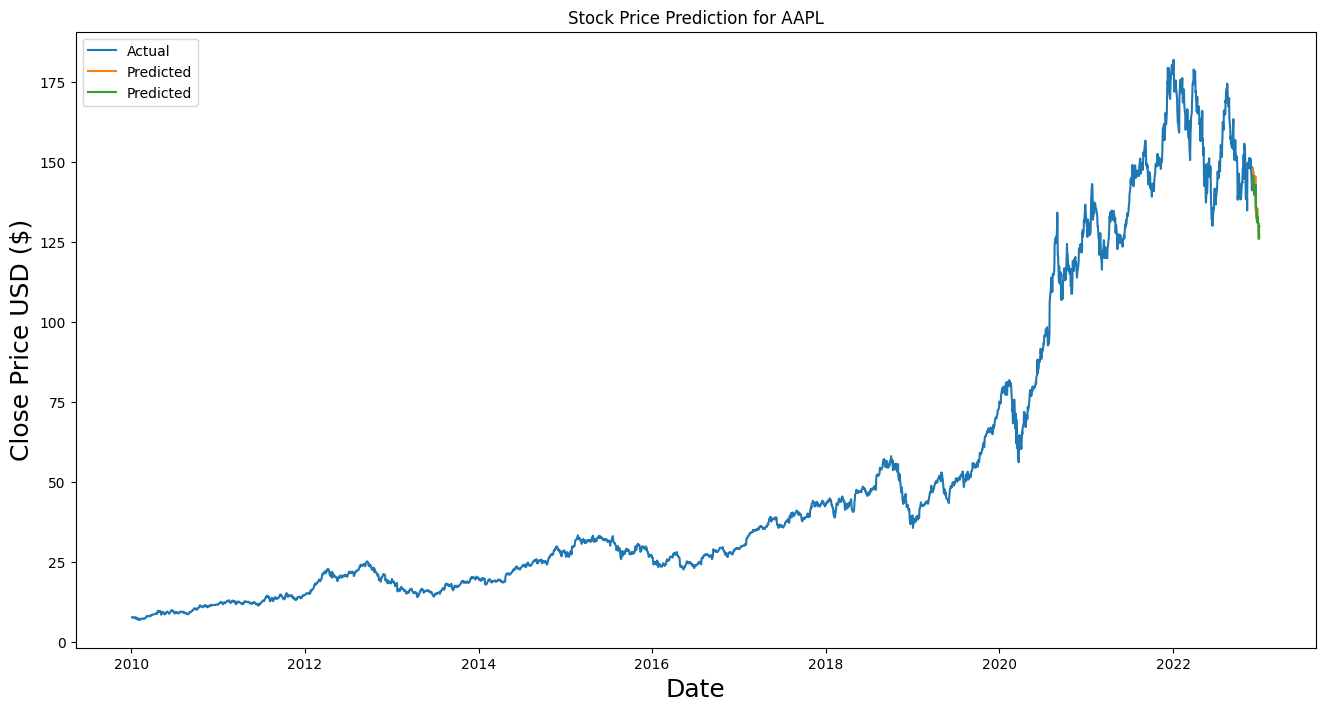

In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

def predict_stock_price(ticker, model, scaler):
    # Load the data for the specific company
    company_df = pd.read_csv('stock_data_100_companies.csv')

    # Ensure the index is a datetime object
    company_df['Date'] = pd.to_datetime(company_df['Date'])  # Convert the 'Date' column to datetime
    company_df.set_index('Date', inplace=True)  # Set the 'Date' column as the index

    # Filter the data for the specific ticker
    company_df = company_df[company_df['Ticker'] == ticker]

    # Preprocess the data
    scaled_data = scaler.transform(company_df['Close'].values.reshape(-1, 1))

    # Create the testing dataset
    test_data = scaled_data[-(60 + 20):]  # Last 60 days + next 20 days for prediction
    X_test = []
    for i in range(60, len(test_data)):
        X_test.append(test_data[i-60:i, 0])

    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    # Get the predicted stock price
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)

    # Visualize the results
    valid = company_df[-20:]  # Last 20 days for validation
    valid['Predictions'] = predictions  # Add predictions to the valid DataFrame

    # Print the predicted prices
    print(f"Predicted prices for {ticker}:")
    for date, pred in zip(valid.index[-20:], predictions.flatten()):
        print(f"Date: {date.strftime('%Y-%m-%d')}, Predicted Price: ${pred:.2f}")

    # Plot the results
    plt.figure(figsize=(16, 8))
    plt.title(f'Stock Price Prediction for {ticker}')
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Close Price USD ($)', fontsize=18)
    plt.plot(company_df['Close'], label='Actual')
    plt.plot(valid[['Close', 'Predictions']], label='Predicted')
    plt.legend()
    plt.show()

# Example usage
# Assuming `model` is your trained model and `scaler` is the MinMaxScaler used during training
predict_stock_price('AAPL', model, scaler)  # Replace 'AAPL' with the desired ticker symbol


In [18]:
# Save the model to a file
model.save('stock_price_prediction_model.h5')


In [20]:
# Import the files module for downloading files
from google.colab import files

# Download the .h5 file
files.download('/content/stock_price_prediction_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>